In [22]:
import json
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

In [24]:
vader_model = SentimentIntensityAnalyzer()

In [26]:
def analyze_sentiment_and_plot_pie_chart(filenames):
    positive_count = 0
    negative_count = 0
    neutral_count = 0

    all_combined_data = []  

    with open(filename, 'r') as file:
        combined_data = json.load(file)

    for video in combined_data:
        sentiment_scores = []

        for comment_tokens in video.get('processed_comments', []):
            comment_string = " ".join(comment_tokens)

            sentiment = vader_model.polarity_scores(comment_string)

            compound_score = sentiment['compound']
            if compound_score > 0.05:
                positive_count += 1
            elif compound_score < -0.05:
                negative_count += 1
            else:
                neutral_count += 1
                
            sentiment_scores.append(sentiment['compound']) 

        video['sentiment_scores'] = sentiment_scores
        all_combined_data.append(video) 

    with open('submission_with_sentiments_maybelline.json', 'w') as output_file:
        json.dump(all_combined_data, output_file, indent=4)
    
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_count, negative_count, neutral_count]
    colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
    explode = (0.1, 0, 0)  
    
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Sentiment Distribution of Comments: Maybelline')
    plt.axis('equal')  
    plt.show()

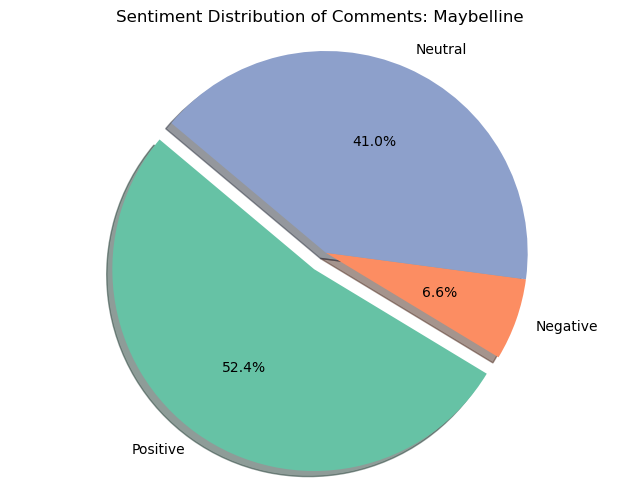

In [28]:
filename = 'combined_data_maybelline.json'
analyze_sentiment_and_plot_pie_chart(filename)

In [15]:
import json

with open('submission_with_sentiments_tarte.json', 'r') as file:
    combined_data = json.load(file)

comment_sentiments = []

for video in combined_data:
    if 'sentiment_scores' in video:
        original_comments = video.get('comments', []) 
        sentiment_scores = video['sentiment_scores']   
        
        for original_comment, score in zip(original_comments, sentiment_scores):
            comment_sentiments.append((original_comment, score))  

top_positive_comments = sorted(comment_sentiments, key=lambda x: x[1], reverse=True)[:10]
top_negative_comments = sorted(comment_sentiments, key=lambda x: x[1])[:10]

print("Top 10 Comments with Highest Polarity:")
for comment, score in top_positive_comments:
    print(f"Comment: {comment}, Polarity Score: {score}\n")

print("\nTop 10 Comments with Lowest Polarity:")
for comment, score in top_negative_comments:
    print(f"Comment: {comment}, Polarity Score: {score}\n")



Top 10 Comments with Highest Polarity:
Comment: OK People ok people 

Hahahahah 


You are so funny 

I 
I r
I re
I rea
I real
I reall
I really 
I really l
I really lo
I really lov
I really love 
I really love y
I really love yo
I really love you
I really love you c
I really love you cu
I really love you cuz 
I really love you cuz y
I really love you cuz yo
I really love you cuz you 
I really love you cuz you'r
I really love you cuz you're 
I really love you cuz you're s
I really love you cuz you're so
I really love you cuz you're so p
I really love you cuz you're so pr
I really love you cuz you're so pre
I really love you cuz you're so pret
I really love you cuz you're so prett
I really love you cuz you're sopretty
I really love you cuz you're so prett
I really love you cuz you're so pret
I really love you cuz you're so pre
I really love you cuz you're so pr
I really love you cuz you're so p
I really love you cuz you're so
I really love you cuz you're s
I really love you cuz you're
I 